MAD Graphs for Patient 11

In [31]:
# Import Modules
import sys
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat

from Modules import Actigraph_Metrics

In [32]:
# signal parameters
freq = 100 #signal is 100hz

Define Functions

In [33]:
def sbs_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-1: [], 0: [], 1: [], 2: []}

    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)

    fig, ax = plt.subplots()
    # Box plot: this version will show the outliers too
    ax.boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax.set_xlabel('SBS Score')
    ax.set_ylabel('MAD')
    return ax, sbs_mad_dict


def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

Patient 11

In [34]:
#data_dir = './PatientData/Patient9/'
data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData/Patient11/'

5-Min Double-Sided Window

In [35]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [36]:
# Load 5 Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

24
24
59899


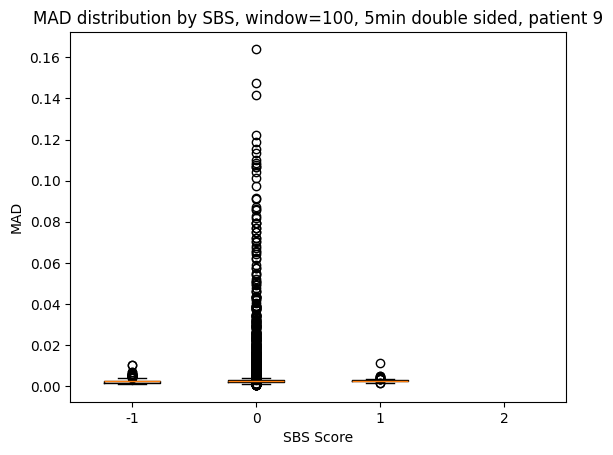

In [37]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 5min double sided, patient 9')
plt.show()

In [38]:
# report_quartiles(sbs_mad_dict)

599


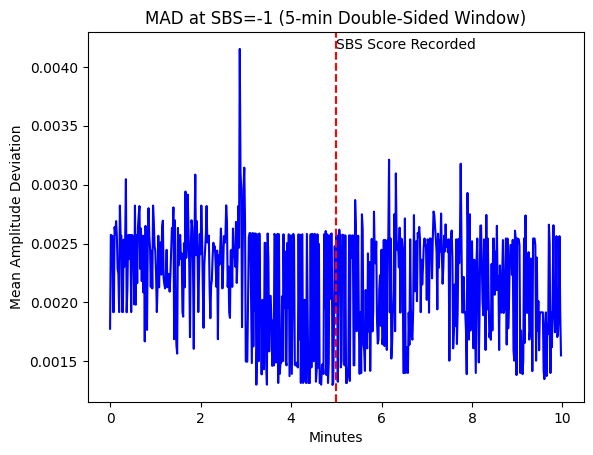

599


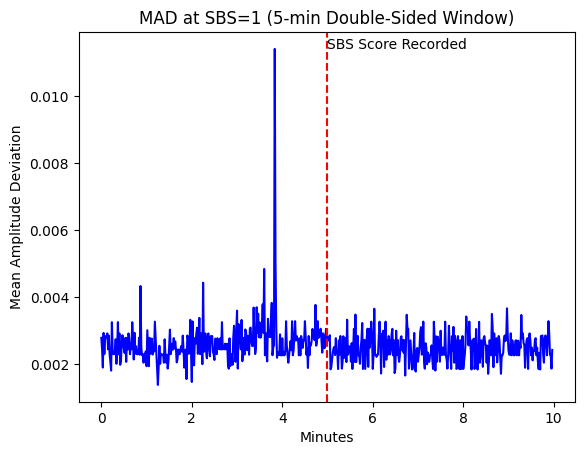

599


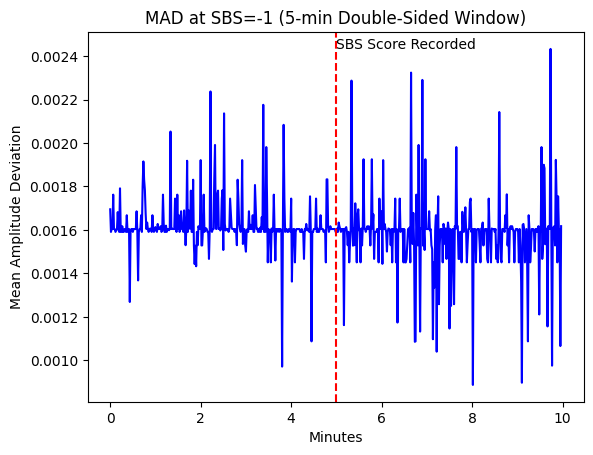

599


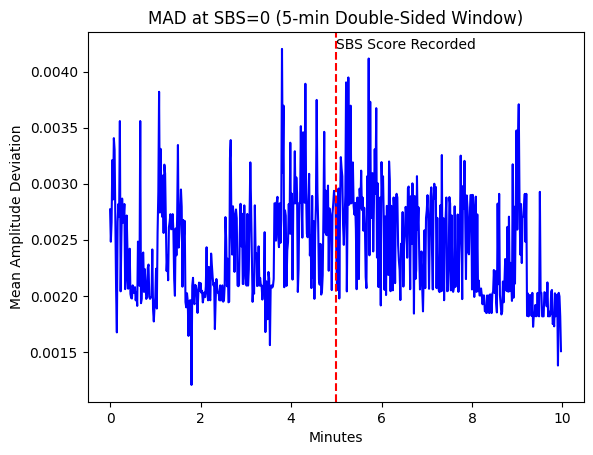

599


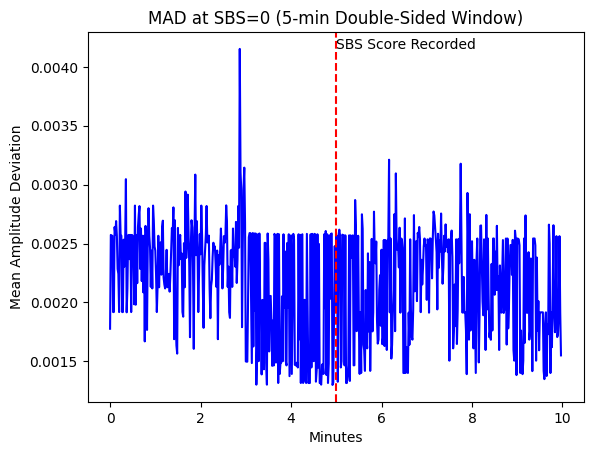

599


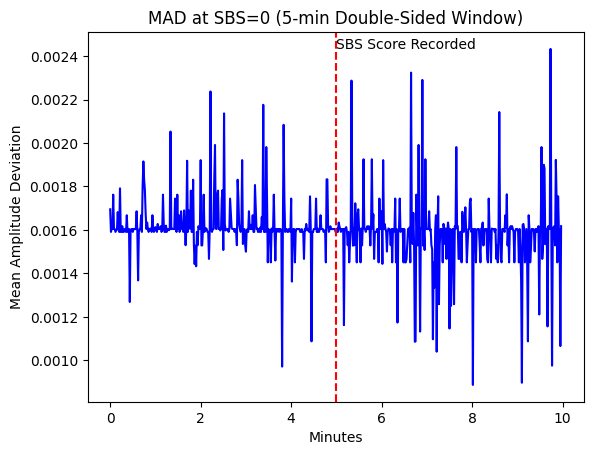

599


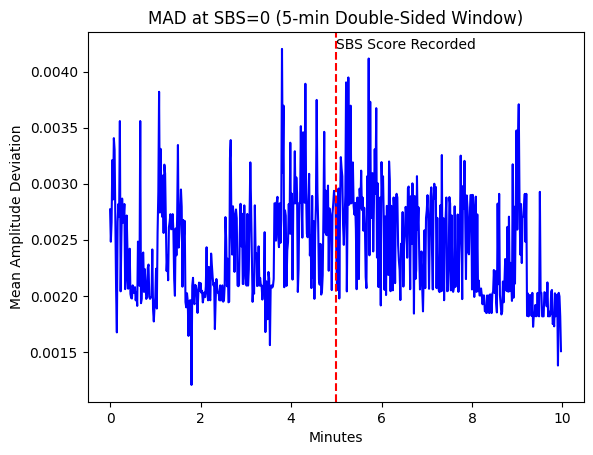

599


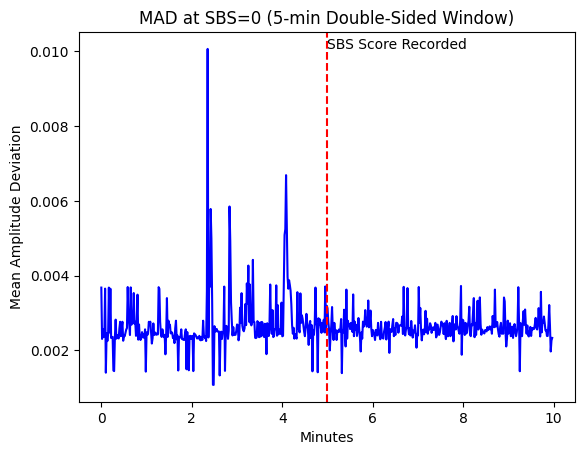

599


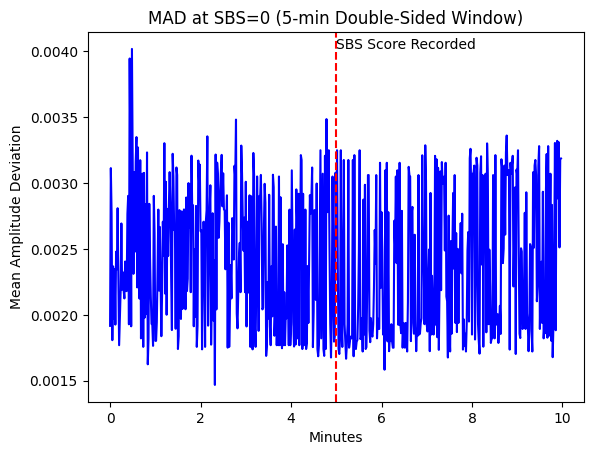

599


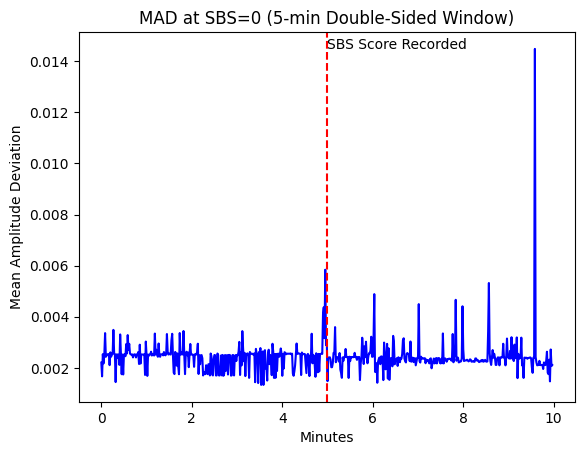

599


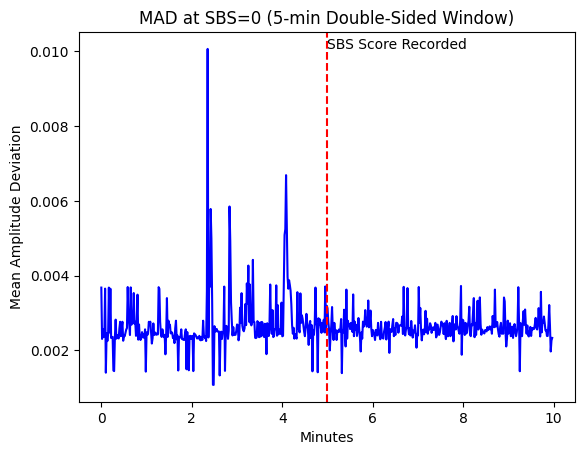

599


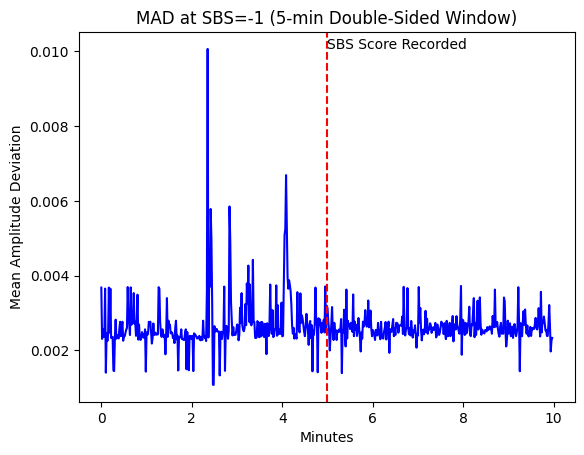

599


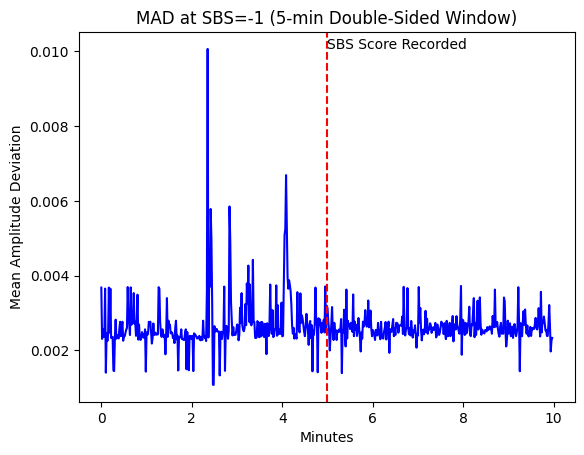

599


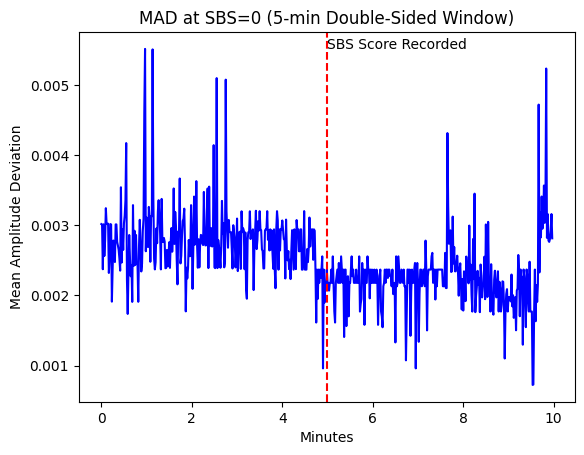

599


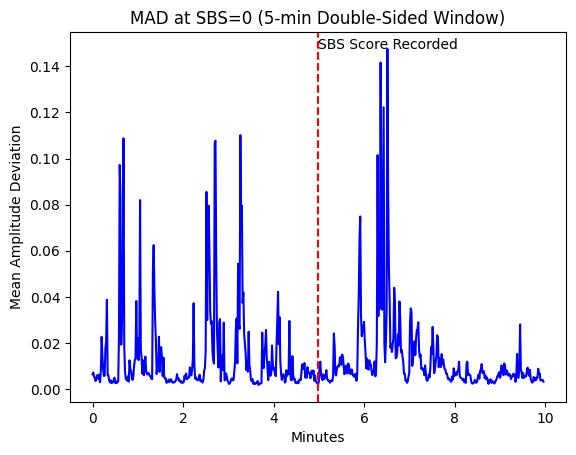

599


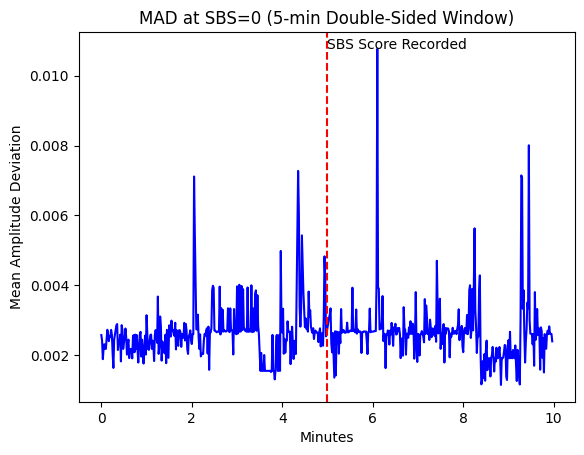

599


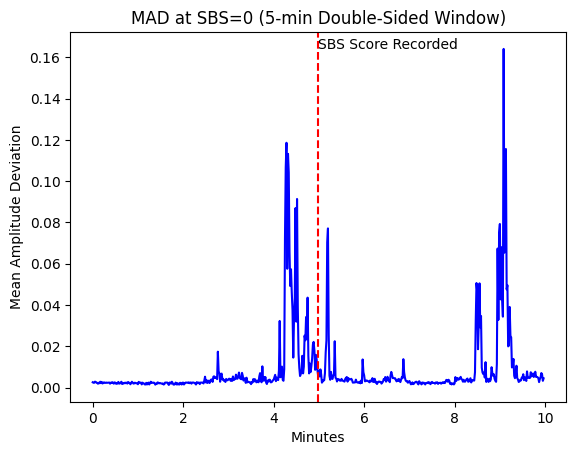

599


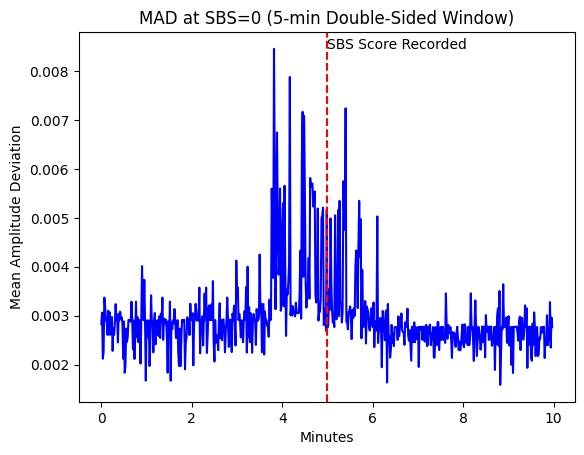

599


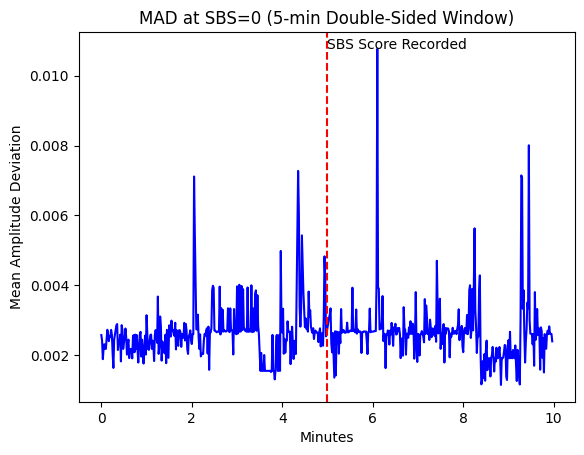

599


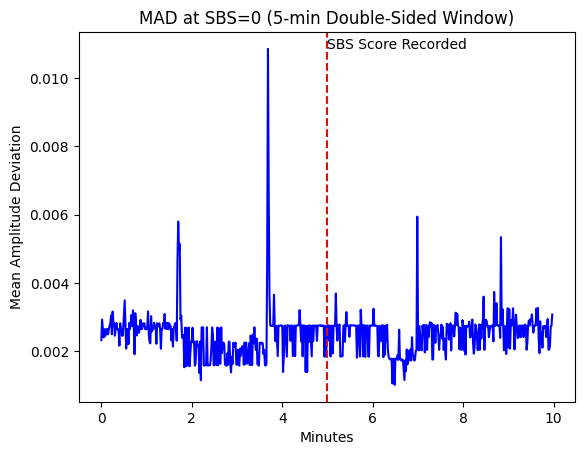

599


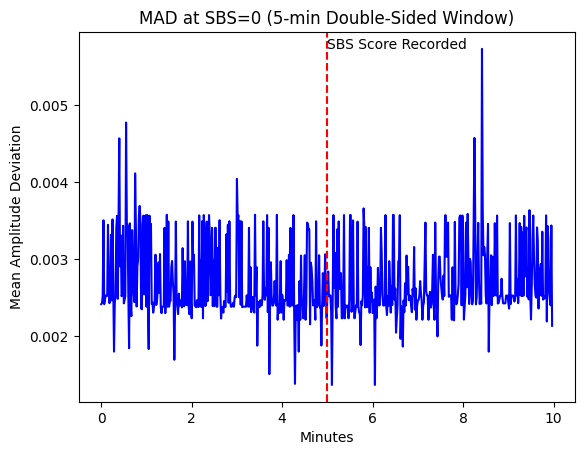

599


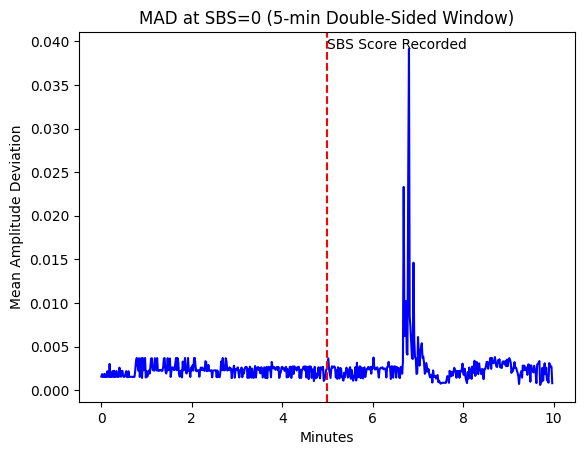

599


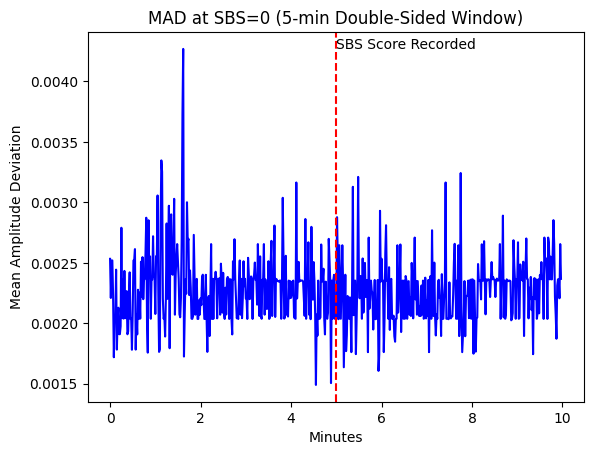

599


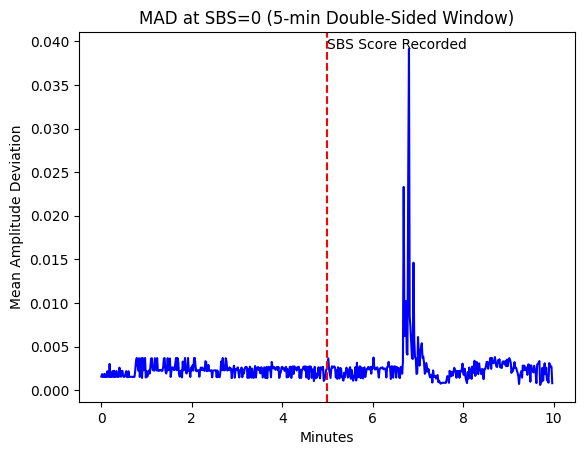

In [39]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline(t[len(t)//2], color='red', linestyle='--')
    plt.text(t[len(t)//2], max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient11_5MIN_DSW_MAD'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

10 Minute - 5 Minute Double-Sided Window

In [40]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_10MIN_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [41]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

24
24
89899


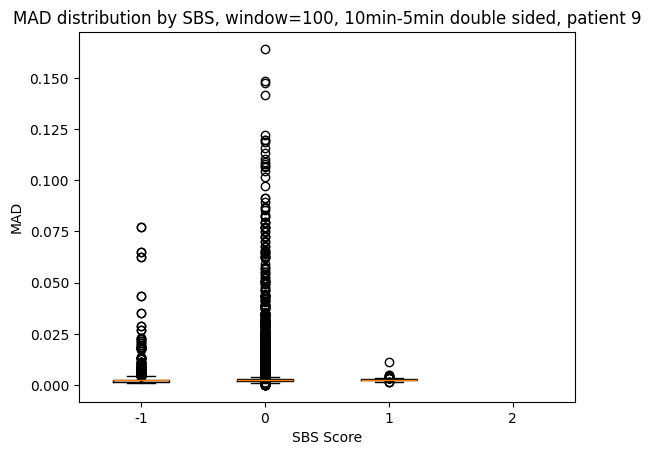

In [42]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 10min-5min double sided, patient 9')
plt.show()

In [43]:
report_quartiles(sbs_mad_dict)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.33), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.33), max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (10-min, 5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient11_10MIN_5MIN_DSW_MAD'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()

15 Minute - 5 Minute Double-Sided

In [ ]:
# TODO: CHANGE THESE PARAMS
# Set params
filename = 'Patient11_15MIN_5MIN_DSW_AllSBS.mat'
window_size = 100 #100 is 1 second worth of time

# Run all the cells below

In [ ]:
# Load 10-Min, 5-Min Double-Sided Window Data
data_path = os.path.join(data_dir, filename)
data = loadmat(data_path)
x_mag = data["x_mag"]
sbs = data["sbs"].flatten()

print(len(x_mag))
print(len(sbs))
print(len(x_mag[0]))

In [ ]:
ax, sbs_mad_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)

plt.title('MAD distribution by SBS, window=100, 15min-5min double sided, patient 9')
plt.show()

In [ ]:
report_quartiles(sbs_mad_dict)

In [ ]:
# Plot MAD against time
count = 0
# Print Graph per SBS
for i, sbs_value in enumerate(sbs):    
    signal = x_mag[i,:]
    signal_mad = Actigraph_Metrics.VecMag_MAD(signal, window_size)
    print(len(signal_mad))
    
    t = np.arange(0, len(signal), step=window_size) / (freq * 60)
    # Plot MAD against time
    plt.plot(t, signal_mad, color='blue')
    # SBS marker
    plt.axvline((t[len(t)//2]*1.5), color='red', linestyle='--')
    plt.text((t[len(t)//2]*1.5), max(signal_mad), "SBS Score Recorded")

    plt.xlabel('Minutes')
    plt.ylabel('Mean Amplitude Deviation')    
    plt.title(f'MAD at SBS={sbs_value} (15-min, 5-min Double-Sided Window)')
    
    # save plots
    folder_path = './AnalysisResults/Patient11_15MIN_5MIN_DSW_MAD'
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)
    plt.savefig(os.path.join(folder_path, f'SBS_{sbs_value}_plot{count}.png'))
    count +=1
    
    plt.show()